In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.get_logger().setLevel('INFO')

# image = Image.open('test2.jpeg')
# print(image.format)
# print(image.size)
# print(image.mode)

2023-01-09 11:18:48.913895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
CONV_GRAYSCALE = np.array([[0.5, 0.5, 0.5]]).reshape(3, -1)

In [3]:
# Load original image
image = Image.open('test2.jpeg')
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
def resize_img(image):
    """
    Resize image to shape (400, 400, 3)
    Args:
    img (PIL): PIL image object
    Returns
    original_image (ndarray (400, 400, 3)) : array of resized image
    """
    img_array = np.asarray(image)
    img_array = img_array[:400, :400, :3]  # Resize image to shape=(400, 400, 3) -fix if too small
    return img_array

In [5]:
def convert_grayscale(original_image):
    """
    Converts original sized image array to grayscale
    Args:
    original_image (ndarray (400, 400, 3)) : array of sized image
    Returns
    X_img (ndarray (1, 160000)) : grayscale, reshaped image array
    """
    X_img = np.dot(original_img, CONV_GRAYSCALE)  # Convert to grayscale shape=(400, 400, 1)
    X_img = X_img.reshape(1, -1)  # Reshape to shape=(1, 160000)
    return X_img

In [6]:
# Get resized, colored image array
original_img = resize_img(image) # shape=(400, 400, 3)
original_img.shape

(400, 400, 3)

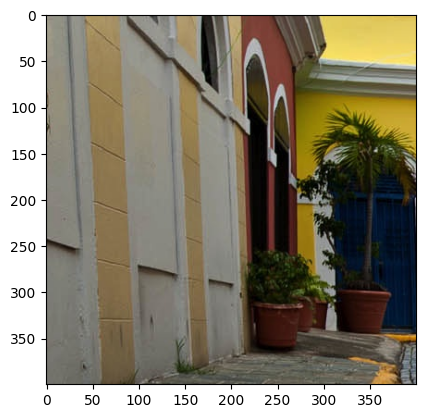

In [7]:
plt.imshow(original_img) # Show color, resized image

In [8]:
# Store X_img and y as one training example
X_img = convert_grayscale(original_img) # Convert image to grayscale and reshape
y = np.array([[0]]) # 0 = no face, 1 = face
(X_img.shape, y)

((1, 160000), array([[0]]))

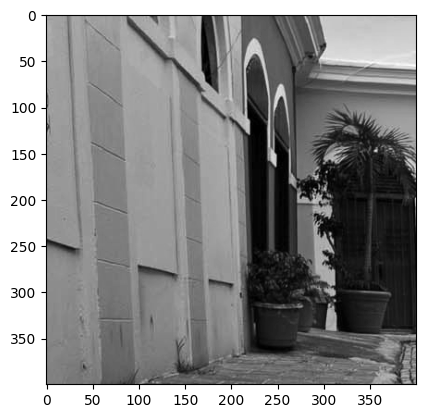

In [9]:
plt.imshow(X_img.reshape(400, 400, 1), cmap='gray') # Show gray, sized image

In [10]:
model = Sequential([
    tf.keras.Input(shape=(160000,)),
    Dense(units=25, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

2023-01-09 11:18:52.233507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                4000025   
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4,000,051
Trainable params: 4,000,051
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(X_img, y)

1/1 [==============================] - 0s 492ms/step - loss: 0.0000e+00


In [13]:
model.predict(X_img)

1/1 [==============================] - 0s 66ms/step


array([[0.]], dtype=float32)